# Quantitative Report

Here we generate quantitative report of performance using RMSE, KL divergence, and Wasserstein distance.

In [14]:
import sys
sys.path.append("./source")

import harmonic
from lmmNet import *
import train_onestep
import predict_onestep
import predict_lmmNet
import train_lmmNet
from scipy.integrate import odeint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

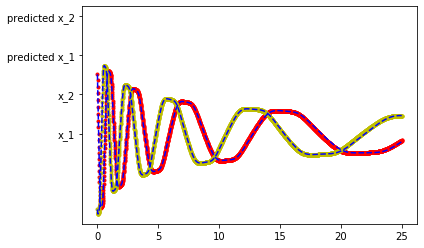

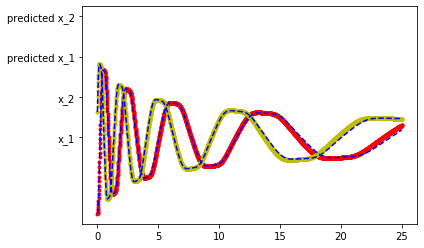

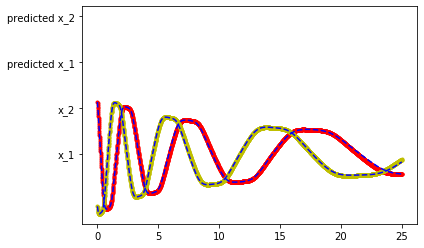

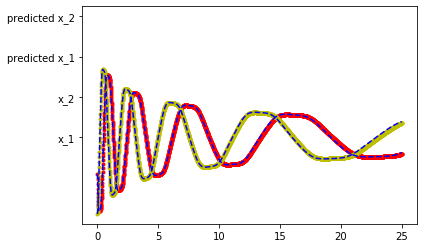

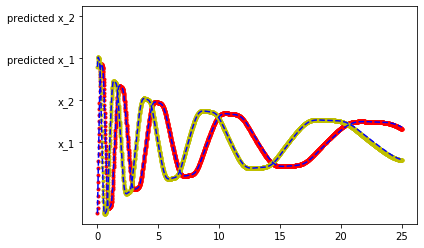

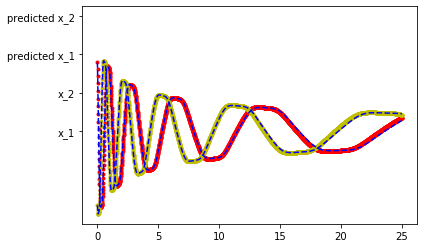

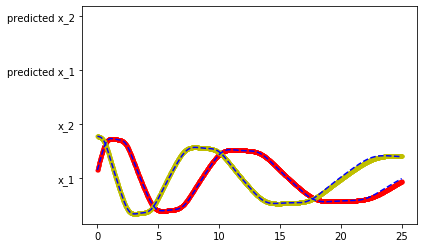

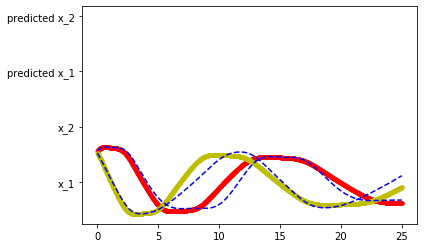

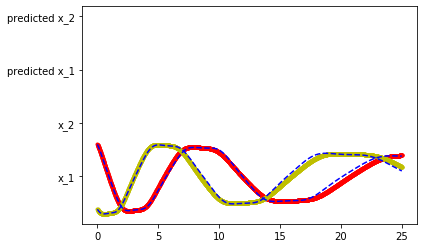

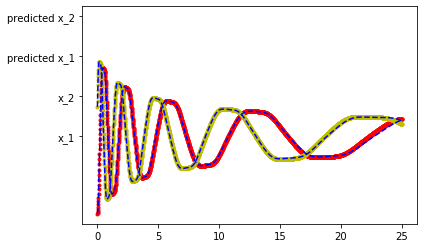

In [15]:
# list to contain the MSEs
MSE_list = []


for _ in range(10):
    # generate data with random initial conditions
    xi = np.random.uniform(-2, 2, 1)[0]
    yi = np.random.uniform(-2, 2, 1)[0]
    time_points, cubic_data = harmonic.simulate_custom(xinit=xi, yinit=yi)
    model = train_lmmNet.train_easy(time_points, cubic_data)
    x0 = np.array([xi, yi]) # initial conditions
    predicted_traj = odeint(lambda x, t: predict_lmmNet.predict_fn(x, t, model), x0, time_points)
    mse1 = predict_lmmNet.compute_MSE(predicted_traj, cubic_data[0], 0)
    mse2 = predict_lmmNet.compute_MSE(predicted_traj, cubic_data[0], 1)
    MSE_list.append((mse1, mse2))
    
    # plot
    plt.plot(time_points, cubic_data[0,:,0], 'r.', 'x_1')
    plt.plot(time_points, cubic_data[0,:,1], 'y.', 'x_2')
    plt.plot(time_points, predicted_traj[:,0], 'b--', 'predicted x_1')
    plt.plot(time_points, predicted_traj[:,1], 'b--', 'predicted x_2')
    plt.show()

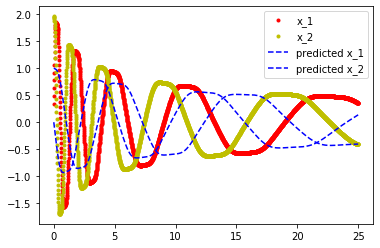

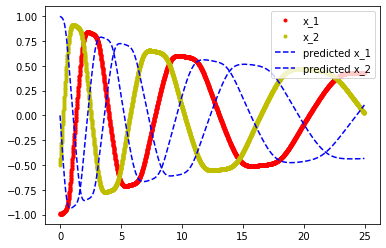

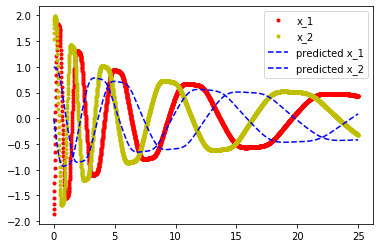

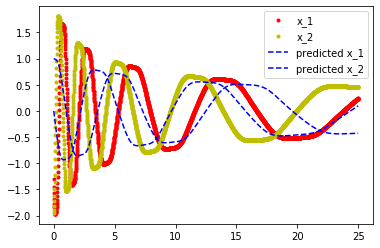

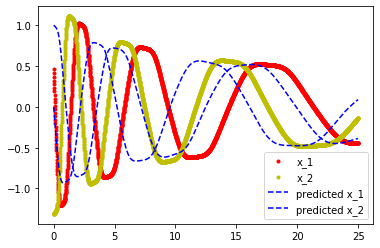

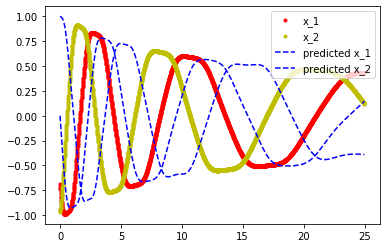

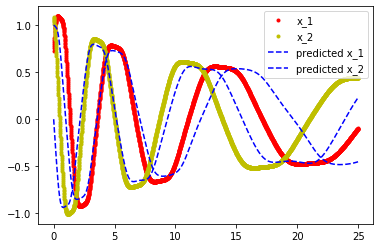

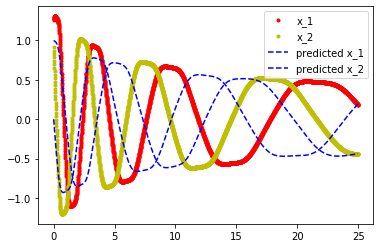

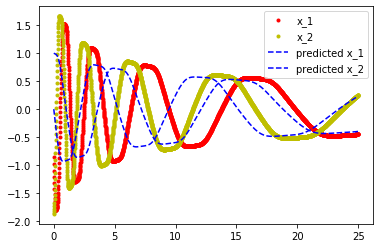

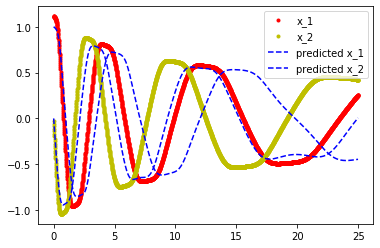

In [18]:
# now we do the same for the test data
mse_lmmnet_list = []
time_points, test_data = harmonic.simulate_custom(xinit=1, yinit=0)

for _ in range(10):
    # generate data with random initial conditions
    xi = np.random.uniform(-2, 2, 1)[0]
    yi = np.random.uniform(-2, 2, 1)[0]
    time_points, cubic_data = harmonic.simulate_custom(xinit=xi, yinit=yi)
    model = train_lmmNet.train_easy(time_points, cubic_data)
    x0 = test_data[0,0,:] # initial conditions
    predicted_traj = odeint(lambda x, t: predict_lmmNet.predict_fn(x, t, model), x0, time_points)
    mse1 = predict_lmmNet.compute_MSE(predicted_traj, test_data[0], 0)
    mse2 = predict_lmmNet.compute_MSE(predicted_traj, test_data[0], 1)
    mse_lmmnet_list.append((mse1, mse2))
    
    # plot
    plt.plot(time_points, cubic_data[0,:,0], 'r.', label='x_1')
    plt.plot(time_points, cubic_data[0,:,1], 'y.', label='x_2')
    plt.plot(time_points, predicted_traj[:,0], 'b--', label='predicted x_1')
    plt.plot(time_points, predicted_traj[:,1], 'b--', label='predicted x_2')
    plt.legend()
    plt.show()

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999994
Target: y_component, CV Pearson R2 coefficient: 0.999990
Average training score: 0.9999923051559414
Real data:


,x_component,y_component
Strain,,
1,1.000000,0.000000
1,0.999001,-0.019970
1,0.998005,-0.039880
1,0.997010,-0.059731
1,0.996014,-0.079522
...,...,...
1,-0.423520,0.169531
1,-0.423345,0.171044
1,-0.423168,0.172556


Predicted data:


,x_component,y_component
Time,,
0.00,1.000000,0.000000
0.01,0.998699,-0.020343
0.02,0.997398,-0.040386
0.03,0.996097,-0.060341
0.04,0.994796,-0.080257
...,...,...
24.95,-0.160248,-0.298402
24.96,-0.160841,-0.298177
24.97,-0.161434,-0.297952


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 1.1343648478667088 RMSE percentage: 145.4415329528513
ML Fit: y_component 0.8935755556143928 RMSE percentage: 247.80829487253203
ML model aggregate error
Average RMSE: 1.0139702017405507
Total percentage error: 196.62491391269165


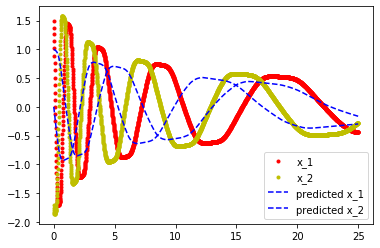

Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999997
Target: y_component, CV Pearson R2 coefficient: 0.999997
Average training score: 0.9999970945348106
Real data:


,x_component,y_component
Strain,,
1,1.000000,0.000000
1,0.999001,-0.019970
1,0.998005,-0.039880
1,0.997010,-0.059731
1,0.996014,-0.079522
...,...,...
1,-0.423520,0.169531
1,-0.423345,0.171044
1,-0.423168,0.172556


Predicted data:


,x_component,y_component
Time,,
0.00,1.000000,0.000000
0.01,0.998625,-0.020420
0.02,0.997250,-0.040780
0.03,0.995876,-0.060982
0.04,0.994501,-0.081055
...,...,...
24.95,0.016690,-0.307819
24.96,0.015957,-0.307817
24.97,0.015225,-0.307815


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 1.5029439939554827 RMSE percentage: 156.0128359558833
ML Fit: y_component 1.2030505535482878 RMSE percentage: 200.8343100386091
ML model aggregate error
Average RMSE: 1.3529972737518854
Total percentage error: 178.4235729972462


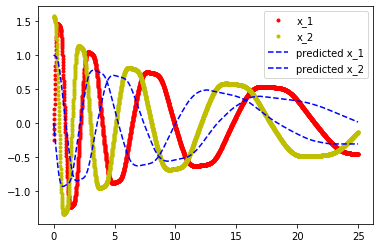

Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999997
Target: y_component, CV Pearson R2 coefficient: 0.999995
Average training score: 0.9999961802919015
Real data:


,x_component,y_component
Strain,,
1,1.000000,0.000000
1,0.999001,-0.019970
1,0.998005,-0.039880
1,0.997010,-0.059731
1,0.996014,-0.079522
...,...,...
1,-0.423520,0.169531
1,-0.423345,0.171044
1,-0.423168,0.172556


Predicted data:


,x_component,y_component
Time,,
0.00,1.000000,0.000000
0.01,0.999517,-0.020993
0.02,0.999029,-0.041986
0.03,0.998542,-0.062980
0.04,0.998054,-0.083975
...,...,...
24.95,-0.244833,0.220565
24.96,-0.244438,0.220832
24.97,-0.244043,0.221100


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 1.6663773901701495 RMSE percentage: 235.46196843406327
ML Fit: y_component 1.6713239777704614 RMSE percentage: 266.5126323889938
ML model aggregate error
Average RMSE: 1.6688506839703054
Total percentage error: 250.98730041152854


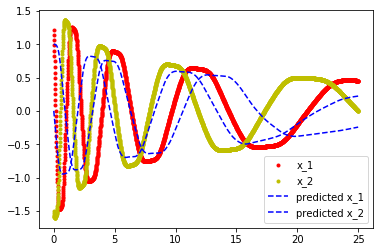

Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999997
Target: y_component, CV Pearson R2 coefficient: 0.999998
Average training score: 0.9999972455208351
Real data:


,x_component,y_component
Strain,,
1,1.000000,0.000000
1,0.999001,-0.019970
1,0.998005,-0.039880
1,0.997010,-0.059731
1,0.996014,-0.079522
...,...,...
1,-0.423520,0.169531
1,-0.423345,0.171044
1,-0.423168,0.172556


Predicted data:


,x_component,y_component
Time,,
0.00,1.000000,0.000000
0.01,0.998651,-0.020366
0.02,0.997302,-0.040599
0.03,0.995953,-0.060836
0.04,0.994604,-0.081011
...,...,...
24.95,0.017199,-0.243711
24.96,0.016763,-0.243488
24.97,0.016328,-0.243264


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 1.600994338794296 RMSE percentage: 172.70990816934625
ML Fit: y_component 1.3082744641070863 RMSE percentage: 247.99167836580557
ML model aggregate error
Average RMSE: 1.4546344014506911
Total percentage error: 210.35079326757594


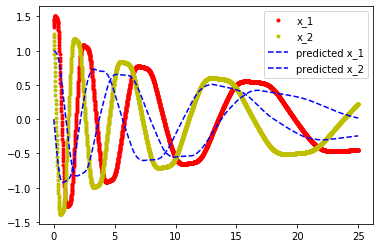

Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999999
Target: y_component, CV Pearson R2 coefficient: 0.999998
Average training score: 0.9999984341981357
Real data:


,x_component,y_component
Strain,,
1,1.000000,0.000000
1,0.999001,-0.019970
1,0.998005,-0.039880
1,0.997010,-0.059731
1,0.996014,-0.079522
...,...,...
1,-0.423520,0.169531
1,-0.423345,0.171044
1,-0.423168,0.172556


Predicted data:


,x_component,y_component
Time,,
0.00,1.000000,0.000000
0.01,0.999355,-0.022225
0.02,0.998711,-0.044450
0.03,0.998066,-0.066679
0.04,0.997421,-0.088908
...,...,...
24.95,0.042278,0.341373
24.96,0.043182,0.341148
24.97,0.044086,0.340923


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 2.1862792005099316 RMSE percentage: 213.2550742319413
ML Fit: y_component 2.295065694750925 RMSE percentage: 301.53066850767
ML model aggregate error
Average RMSE: 2.2406724476304283
Total percentage error: 257.3928713698057


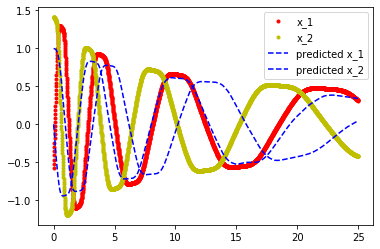

Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999997
Target: y_component, CV Pearson R2 coefficient: 0.999996
Average training score: 0.999996489474942
Real data:


,x_component,y_component
Strain,,
1,1.000000,0.000000
1,0.999001,-0.019970
1,0.998005,-0.039880
1,0.997010,-0.059731
1,0.996014,-0.079522
...,...,...
1,-0.423520,0.169531
1,-0.423345,0.171044
1,-0.423168,0.172556


Predicted data:


,x_component,y_component
Time,,
0.00,1.000000,0.000000
0.01,0.998310,-0.020355
0.02,0.996620,-0.040617
0.03,0.994930,-0.060857
0.04,0.993239,-0.081000
...,...,...
24.95,-0.206063,-0.208865
24.96,-0.206374,-0.208476
24.97,-0.206684,-0.208087


./source/predict_onestep.py:217: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(q

ML Fit: x_component 0.7558242529328281 RMSE percentage: 113.09472832929445
ML Fit: y_component 0.55024051663889 RMSE percentage: 213.31987344135334
ML model aggregate error
Average RMSE: 0.653032384785859
Total percentage error: 163.2073008853239


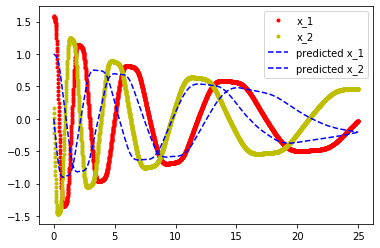

Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999997
Target: y_component, CV Pearson R2 coefficient: 0.999996
Average training score: 0.999996212462436
Real data:


,x_component,y_component
Strain,,
1,1.000000,0.000000
1,0.999001,-0.019970
1,0.998005,-0.039880
1,0.997010,-0.059731
1,0.996014,-0.079522
...,...,...
1,-0.423520,0.169531
1,-0.423345,0.171044
1,-0.423168,0.172556


Predicted data:


,x_component,y_component
Time,,
0.00,1.000000,0.000000
0.01,0.999600,-0.021079
0.02,0.999199,-0.042254
0.03,0.998799,-0.063438
0.04,0.998399,-0.084622
...,...,...
24.95,-0.190799,0.296170
24.96,-0.190076,0.296206
24.97,-0.189353,0.296192


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 1.8858147274732842 RMSE percentage: 245.17025258138347
ML Fit: y_component 1.9217516863941193 RMSE percentage: 276.18916093094975
ML model aggregate error
Average RMSE: 1.9037832069337017
Total percentage error: 260.6797067561666


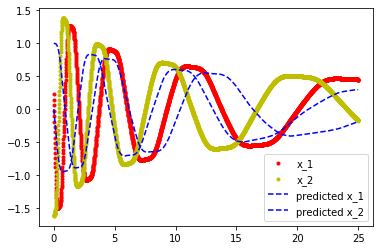

Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999999
Target: y_component, CV Pearson R2 coefficient: 0.999999
Average training score: 0.9999992448906542
Real data:


,x_component,y_component
Strain,,
1,1.000000,0.000000
1,0.999001,-0.019970
1,0.998005,-0.039880
1,0.997010,-0.059731
1,0.996014,-0.079522
...,...,...
1,-0.423520,0.169531
1,-0.423345,0.171044
1,-0.423168,0.172556


Predicted data:


,x_component,y_component
Time,,
0.00,1.000000,0.000000
0.01,0.999020,-0.019906
0.02,0.998038,-0.039644
0.03,0.997055,-0.059301
0.04,0.996073,-0.078935
...,...,...
24.95,-0.438435,0.132332
24.96,-0.438434,0.134018
24.97,-0.438433,0.135705


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.15824027257295217 RMSE percentage: 65.09572219687807
ML Fit: y_component 0.1643014189183971 RMSE percentage: 102.4119747428674
ML model aggregate error
Average RMSE: 0.16127084574567463
Total percentage error: 83.75384846987274


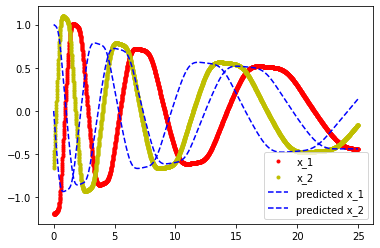

Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999991
Target: y_component, CV Pearson R2 coefficient: 0.999982
Average training score: 0.9999863229541694
Real data:


,x_component,y_component
Strain,,
1,1.000000,0.000000
1,0.999001,-0.019970
1,0.998005,-0.039880
1,0.997010,-0.059731
1,0.996014,-0.079522
...,...,...
1,-0.423520,0.169531
1,-0.423345,0.171044
1,-0.423168,0.172556


Predicted data:


,x_component,y_component
Time,,
0.00,1.000000,0.000000
0.01,0.998314,-0.020427
0.02,0.996628,-0.040809
0.03,0.994942,-0.061190
0.04,0.993256,-0.081517
...,...,...
24.95,-0.344095,-0.133383
24.96,-0.343979,-0.132376
24.97,-0.343864,-0.131369


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.5334799973263031 RMSE percentage: 107.92381079287259
ML Fit: y_component 0.5138497897330812 RMSE percentage: 165.66465573005442
ML model aggregate error
Average RMSE: 0.5236648935296921
Total percentage error: 136.79423326146352


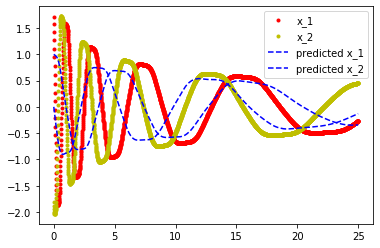

Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999993
Target: y_component, CV Pearson R2 coefficient: 0.999992
Average training score: 0.999992751091251
Real data:


,x_component,y_component
Strain,,
1,1.000000,0.000000
1,0.999001,-0.019970
1,0.998005,-0.039880
1,0.997010,-0.059731
1,0.996014,-0.079522
...,...,...
1,-0.423520,0.169531
1,-0.423345,0.171044
1,-0.423168,0.172556


Predicted data:


,x_component,y_component
Time,,
0.00,1.000000,0.000000
0.01,0.998428,-0.020543
0.02,0.996855,-0.041036
0.03,0.995283,-0.061481
0.04,0.993711,-0.081764
...,...,...
24.95,-0.102228,-0.290318
24.96,-0.102902,-0.290139
24.97,-0.103574,-0.289960


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 1.485388706244778 RMSE percentage: 173.42771381278519
ML Fit: y_component 1.2525984369566792 RMSE percentage: 260.50979197439517
ML model aggregate error
Average RMSE: 1.3689935716007287
Total percentage error: 216.9687528935902


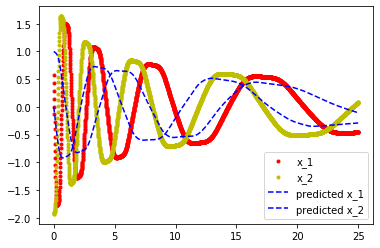

In [19]:
from utils import *
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

# now for one-step method
# now we do the same for the test data
mse_onestep_list = []
time_points, test_data = harmonic.simulate_custom(xinit=1, yinit=0)

feature_list = [] # here we do not have external time-series or control variables
target_list = ['x_component', 'y_component']
df_test = create_data(test_data, time_points, cols=target_list, num=1)

for _ in range(10):
    # generate data with random initial conditions
    xi = np.random.uniform(-2, 2, 1)[0]
    yi = np.random.uniform(-2, 2, 1)[0]
    time_points, cubic_data = harmonic.simulate_custom(xinit=xi, yinit=yi)    

    # now generate and augment the training dataset
    df = create_data(cubic_data, time_points, cols=target_list)
    df_train = train_onestep.generate_dataset(df, [0],feature_list, target_list, n_dim=30000)

    rf_model = RandomForestRegressor(n_estimators=20)
    figure_path = './plots/'
    rf_dict, score_dict = train_onestep.train_classic(df_train, rf_model, plot=False,model_type='random_forest', figure_path=figure_path)
    time_points, predictions = predict_onestep.predict_integrate(df_test, df, rf_dict, target_list, feature_list, title='test', plot=False,model_type='random_forest', subplots=(2,1), bio=False)
    predictions = predictions.to_numpy()
    mse1 = predict_lmmNet.compute_MSE(predictions, test_data[0], 0)
    mse2 = predict_lmmNet.compute_MSE(predictions, test_data[0], 1)
    mse_onestep_list.append((mse1, mse2))
    
    # plot
    plt.plot(time_points, cubic_data[0,:,0], 'r.', label='x_1')
    plt.plot(time_points, cubic_data[0,:,1], 'y.', label='x_2')
    plt.plot(time_points, predictions[:,0], 'b--', label='predicted x_1')
    plt.plot(time_points, predictions[:,1], 'b--', label='predicted x_2')
    plt.legend()
    plt.show()

In [20]:
import pickle

with open('mse_lmmnet.pkl', 'wb') as file:
    pickle.dump(mse_lmmnet_list, file)
    
with open('mse_onestep.pkl', 'wb') as file:
    pickle.dump(mse_onestep_list, file)

Now we repeat for the 3D Oscillator using both one-step learning and LmmNet. Also get SINDy results.

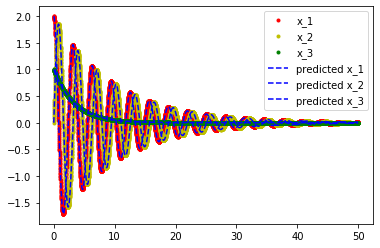

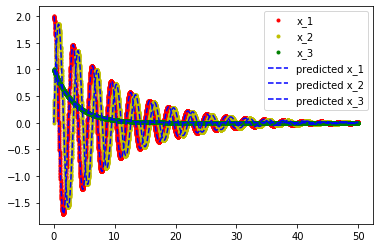

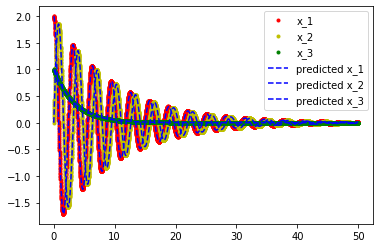

In [ ]:
import linear

# now we do the same for 3D linear oscillator

mse_lmmnet_list = []
time_points, test_data = linear.simulate_default()

for _ in range(10):
    # generate data with random initial conditions
    xi = np.random.uniform(-2, 2, 1)[0]
    yi = np.random.uniform(-2, 2, 1)[0]
    zi = np.random.uniform(-2, 2, 1)[0]
    time_points, cubic_data = linear.simulate_custom(xinit=xi, yinit=yi, zinit=zi)
    model = train_lmmNet.train_easy(time_points, cubic_data)
    x0 = test_data[0,0,:] # initial conditions
    predicted_traj = odeint(lambda x, t: predict_lmmNet.predict_fn(x, t, model), x0, time_points)
    mse1 = predict_lmmNet.compute_MSE(predicted_traj, test_data[0], 0)
    mse2 = predict_lmmNet.compute_MSE(predicted_traj, test_data[0], 1)
    mse3 = predict_lmmNet.compute_MSE(predicted_traj, test_data[0], 2)
    mse_lmmnet_list.append((mse1, mse2, mse3))
    
    # plot
    plt.plot(time_points, test_data[0,:,0], 'r.', label='x_1')
    plt.plot(time_points, test_data[0,:,1], 'y.', label='x_2')
    plt.plot(time_points, test_data[0,:,2], 'g.', label='x_3')
    plt.plot(time_points, predicted_traj[:,0], 'b--', label='predicted x_1')
    plt.plot(time_points, predicted_traj[:,1], 'b--', label='predicted x_2')
    plt.plot(time_points, predicted_traj[:,2], 'b--', label='predicted x_3')
    plt.legend()
    plt.show()

## 1. Performance improvement with Epochs

Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

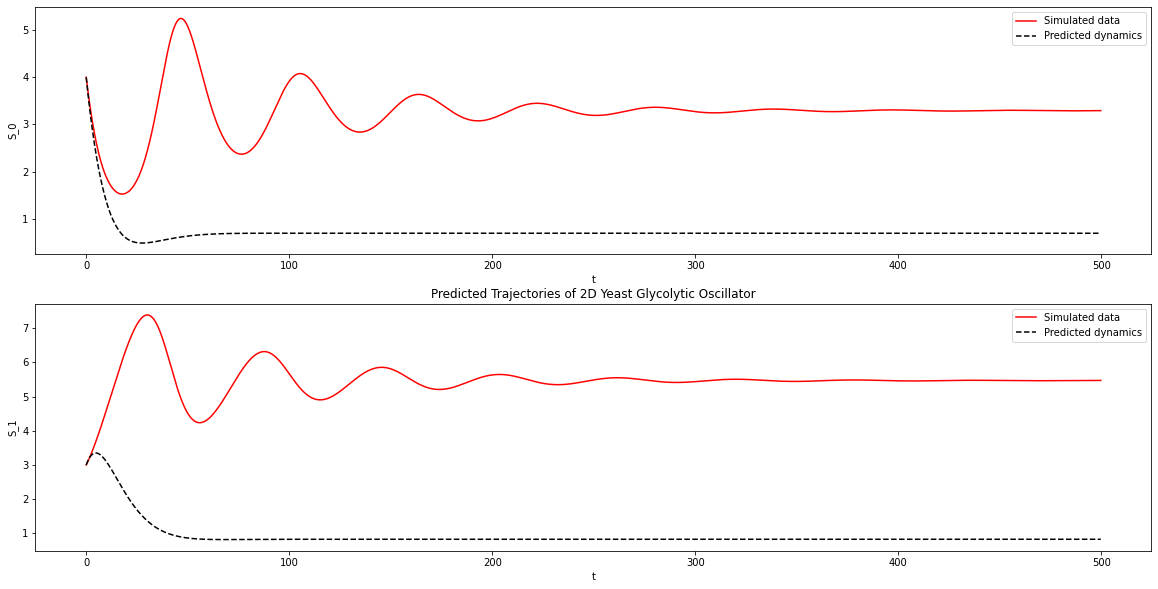

In [4]:
# test if it works for 5 epochs
net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 5
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

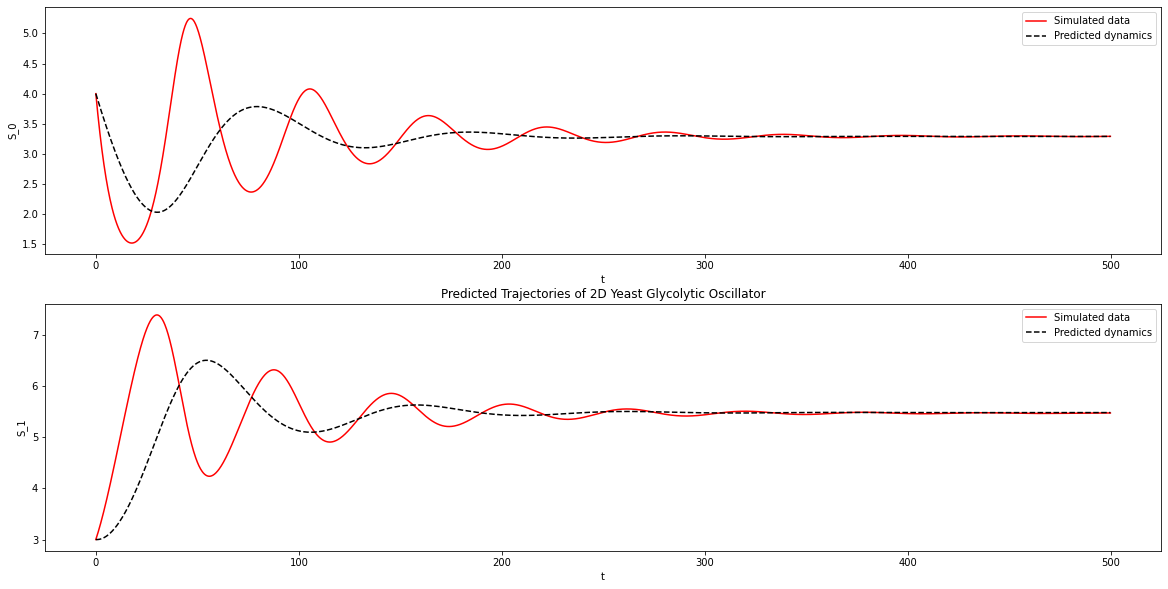

In [5]:
# test for 100 epochs

net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 100
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

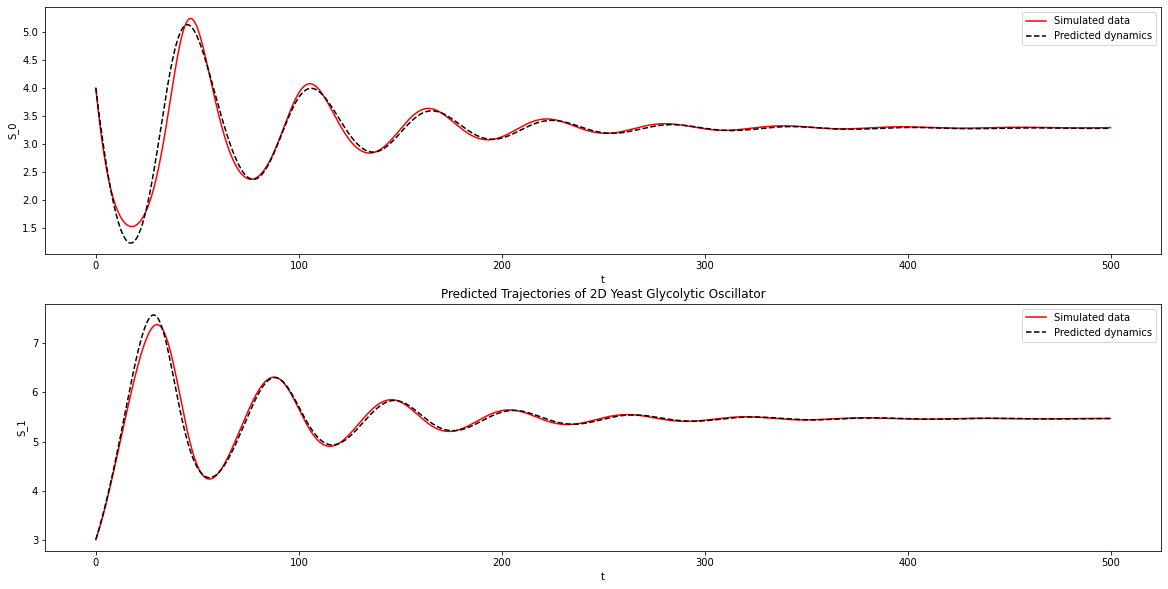

In [7]:
# test for 1000 epochs

net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 1000
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

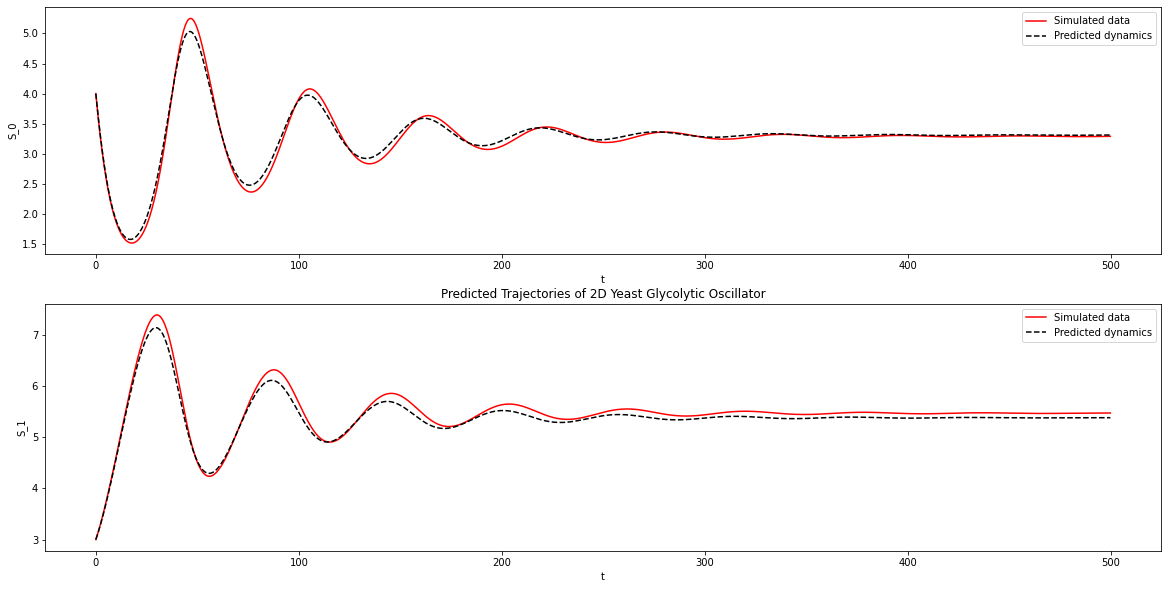

In [8]:
# test for 10000 epochs

net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 10000
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


## 2. Plot performance

Note that here we use normalized MSE.

In [33]:
avg_mse_onestep = []
for mse_tuple in mse_onestep_list:
    avg_mse_onestep.append(np.mean(mse_tuple))
print("Total average: ", np.mean(avg_mse_onestep))
avg_mse_onestep

Total average:  0.5184612031239431


[0.4257642914081475,
 0.5681108786985298,
 0.7012300296813713,
 0.6107942719960932,
 0.9417333504365886,
 0.27418195100135173,
 0.8000082639775353,
 0.06777821799615716,
 0.22009648651489702,
 0.5749142895287593]

In [32]:
avg_mse_lmmnet = []
for mse_tuple in mse_lmmnet_list:
    avg_mse_lmmnet.append( np.mean(mse_tuple))
print("Total average: ", np.mean(avg_mse_lmmnet))
avg_mse_lmmnet

Total average:  0.09058012319572831


[0.03113665221561353,
 0.06083492850992751,
 0.09859113281666126,
 0.06717392840226048,
 0.11358646567144451,
 0.10079804349803695,
 0.09884203884941123,
 0.06969103907743827,
 0.11050737540523334,
 0.15463962751125593]

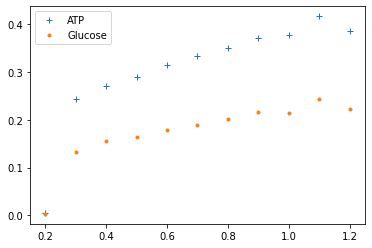

In [23]:
plt.plot(h_list, error1_list, '+', label='ATP')
plt.plot(h_list, error2_list, '.', label='Glucose')
plt.legend()